In [236]:
import datetime
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from ta import add_all_ta_features #pip install --upgrade ta https://github.com/bukosabino/ta https://medium.datadriveninvestor.com/predicting-the-stock-market-with-python-bba3cf4c56ef
from fastai.tabular.all import add_datepart #pip install fastai https://docs.fast.ai/tabular.core.html https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/

In [237]:
# Install Apple dataset
aapl = pd.read_csv("data/AAPL_data.csv")
aapl = aapl.dropna()
aapl.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [238]:
# Add date features 
# ["Year", "Month", "Week", "Day", "Dayofweek", "Dayofyear", "Is_month_end", "Is_month_start", "Is_quarter_end", "Is_quarter_start", "Is_year_end", "Is_year_start"]
aapl["Date"]=pd.to_datetime(aapl.Date, format="%Y-%m-%d")
aapl.index=aapl['Date']
data = aapl.sort_index(ascending=True, axis=0)
add_datepart(aapl, 'Date', drop=False)
aapl.drop('Elapsed', axis=1, inplace=True)
aapl

Date        High         Low        Open       Close  \
Date                                                                    
2017-04-28 2017-04-28   36.075001   35.817501   36.022499   35.912498   
2017-05-01 2017-05-01   36.799999   36.240002   36.275002   36.645000   
2017-05-02 2017-05-02   37.022499   36.709999   36.884998   36.877499   
2017-05-03 2017-05-03   36.872501   36.067501   36.397499   36.764999   
2017-05-04 2017-05-04   36.785000   36.452499   36.630001   36.632500   
...               ...         ...         ...         ...         ...   
2022-04-22 2022-04-22  167.869995  161.500000  166.460007  161.789993   
2022-04-25 2022-04-25  163.169998  158.460007  161.119995  162.880005   
2022-04-26 2022-04-26  162.339996  156.720001  162.250000  156.800003   
2022-04-27 2022-04-27  159.789993  155.380005  155.910004  156.570007   
2022-04-28 2022-04-28  164.520004  158.929993  159.250000  163.639999   

                 Volume   Adj Close  Year  Month  Week  Day  Dayofweek  \
Date                                                                     
2017-04-28   83441600.0   33.907143  2017      4    17   28          4   
2017-05-01  134411600.0   34.598736  2017      5    18    1          0   
2017-05-02  181408800.0   34.818253  2017      5    18    2          1   
2017-05-03  182788000.0   34.712040  2017      5    18    3          2   
2017-05-04   93487600.0   34.586937  2017      5    18    4          3   
...                 ...         ...   ...    ...   ...  ...        ...   
2022-04-22   84775200.0  161.789993  2022      4    16   22          4   
2022-04-25   96046400.0  162.880005  2022      4    17   25          0   
2022-04-26   95623200.0  156.800003  2022      4    17   26          1   
2022-04-27   88063200.0  156.570007  2022      4    17   27          2   
2022-04-28  115586400.0  163.639999  2022      4    17   28          3   

            Dayofyear  Is_month_end  Is_month_start  Is_quarter_end  \
Date                                                                  
2017-04-28        118         False           False           False   
2017-05-01        121         False            True           False   
2017-05-02        122         False           False           False   
2017-05-03        123         False           False           False   
2017-05-04        124         False           False           False   
...               ...           ...             ...             ...   
2022-04-22        112         False           False           False   
2022-04-25        115         False           False           False   
2022-04-26        116         False           False           False   
2022-04-27        117         False           False           False   
2022-04-28        118         False           False           False   

            Is_quarter_start  Is_year_end  Is_year_start  
Date                                                      
2017-04-28             False        False          False  
2017-05-01             False        False          False  
2017-05-02             False        False          False  
2017-05-03             False        False          False  
2017-05-04             False        False          False  
...                      ...          ...            ...  
2022-04-22             False        False          False  
2022-04-25             False        False          False  
2022-04-26             False        False          False  
2022-04-27             False        False          False  
2022-04-28             False        False          False  

[1260 rows x 19 columns]

In [239]:
# Add technical features
aapl = add_all_ta_features(
    aapl, high="High", low="Low", open="Open", close="Close", volume="Volume")

/Users/ayakowatanabe/opt/anaconda3/lib/python3.8/site-packages/ta/trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/Users/ayakowatanabe/opt/anaconda3/lib/python3.8/site-packages/ta/trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [240]:
aapl.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Year',
       'Month', 'Week',
       ...
       'momentum_ppo', 'momentum_ppo_signal', 'momentum_ppo_hist',
       'momentum_pvo', 'momentum_pvo_signal', 'momentum_pvo_hist',
       'momentum_kama', 'others_dr', 'others_dlr', 'others_cr'],
      dtype='object', length=105)

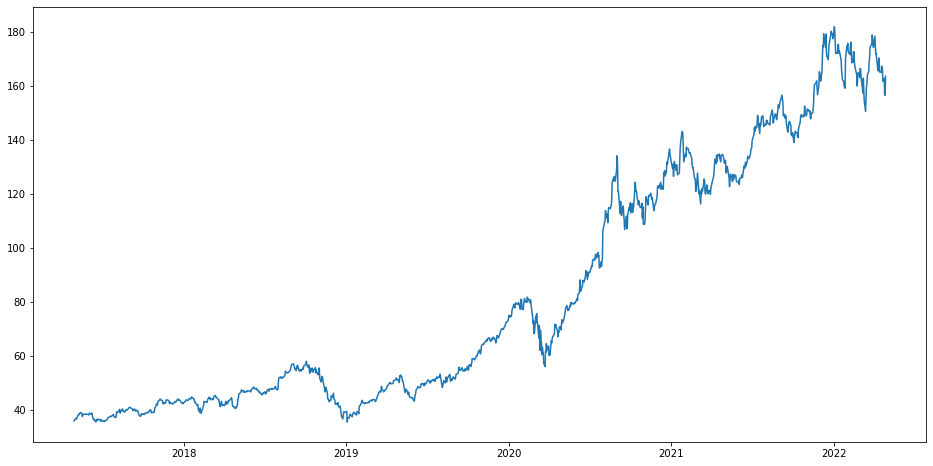

In [241]:
# Plot time-series close price (target)
plt.figure(figsize=(16,8))
plt.plot(aapl["Close"],label='Close Price history')

In [242]:
aapl.describe().transpose()

count          mean           std           min  \
High               1260.0  8.421868e+01  4.562221e+01  3.587500e+01   
Low                1260.0  8.237222e+01  4.450101e+01  3.550000e+01   
Open               1260.0  8.327733e+01  4.506515e+01  3.572500e+01   
Close              1260.0  8.333572e+01  4.508212e+01  3.554750e+01   
Volume             1260.0  1.203012e+08  5.537957e+07  4.100000e+07   
...                   ...           ...           ...           ...   
momentum_pvo_hist  1227.0 -2.778665e-02  4.135774e+00 -9.849101e+00   
momentum_kama      1251.0  8.335606e+01  4.479638e+01  3.667443e+01   
others_dr          1260.0  9.462194e-02  2.540043e+00 -5.690623e+01   
others_dlr         1259.0  1.204594e-01  1.969178e+00 -1.377081e+01   
others_cr          1260.0  1.320521e+02  1.255332e+02 -1.016353e+00   

                            25%           50%           75%           max  
High               4.484750e+01  6.130625e+01  1.269450e+02  1.829400e+02  
Low                4.406375e+01  5.932250e+01  1.240700e+02  1.791200e+02  
Open               4.446937e+01  6.038875e+01  1.253450e+02  1.826300e+02  
Close              4.449375e+01  6.045250e+01  1.254650e+02  1.820100e+02  
Volume             8.366980e+07  1.052034e+08  1.401684e+08  4.265100e+08  
...                         ...           ...           ...           ...  
momentum_pvo_hist -2.804321e+00 -5.282701e-01  2.411457e+00  2.009455e+01  
momentum_kama      4.511240e+01  6.194716e+01  1.259329e+02  1.758341e+02  
others_dr         -7.682514e-01  1.205125e-01  1.156043e+00  1.198083e+01  
others_dlr        -7.701660e-01  1.232671e-01  1.150043e+00  1.131575e+01  
others_cr          2.389489e+01  6.833276e+01  2.493631e+02  4.068152e+02  

[98 rows x 8 columns]

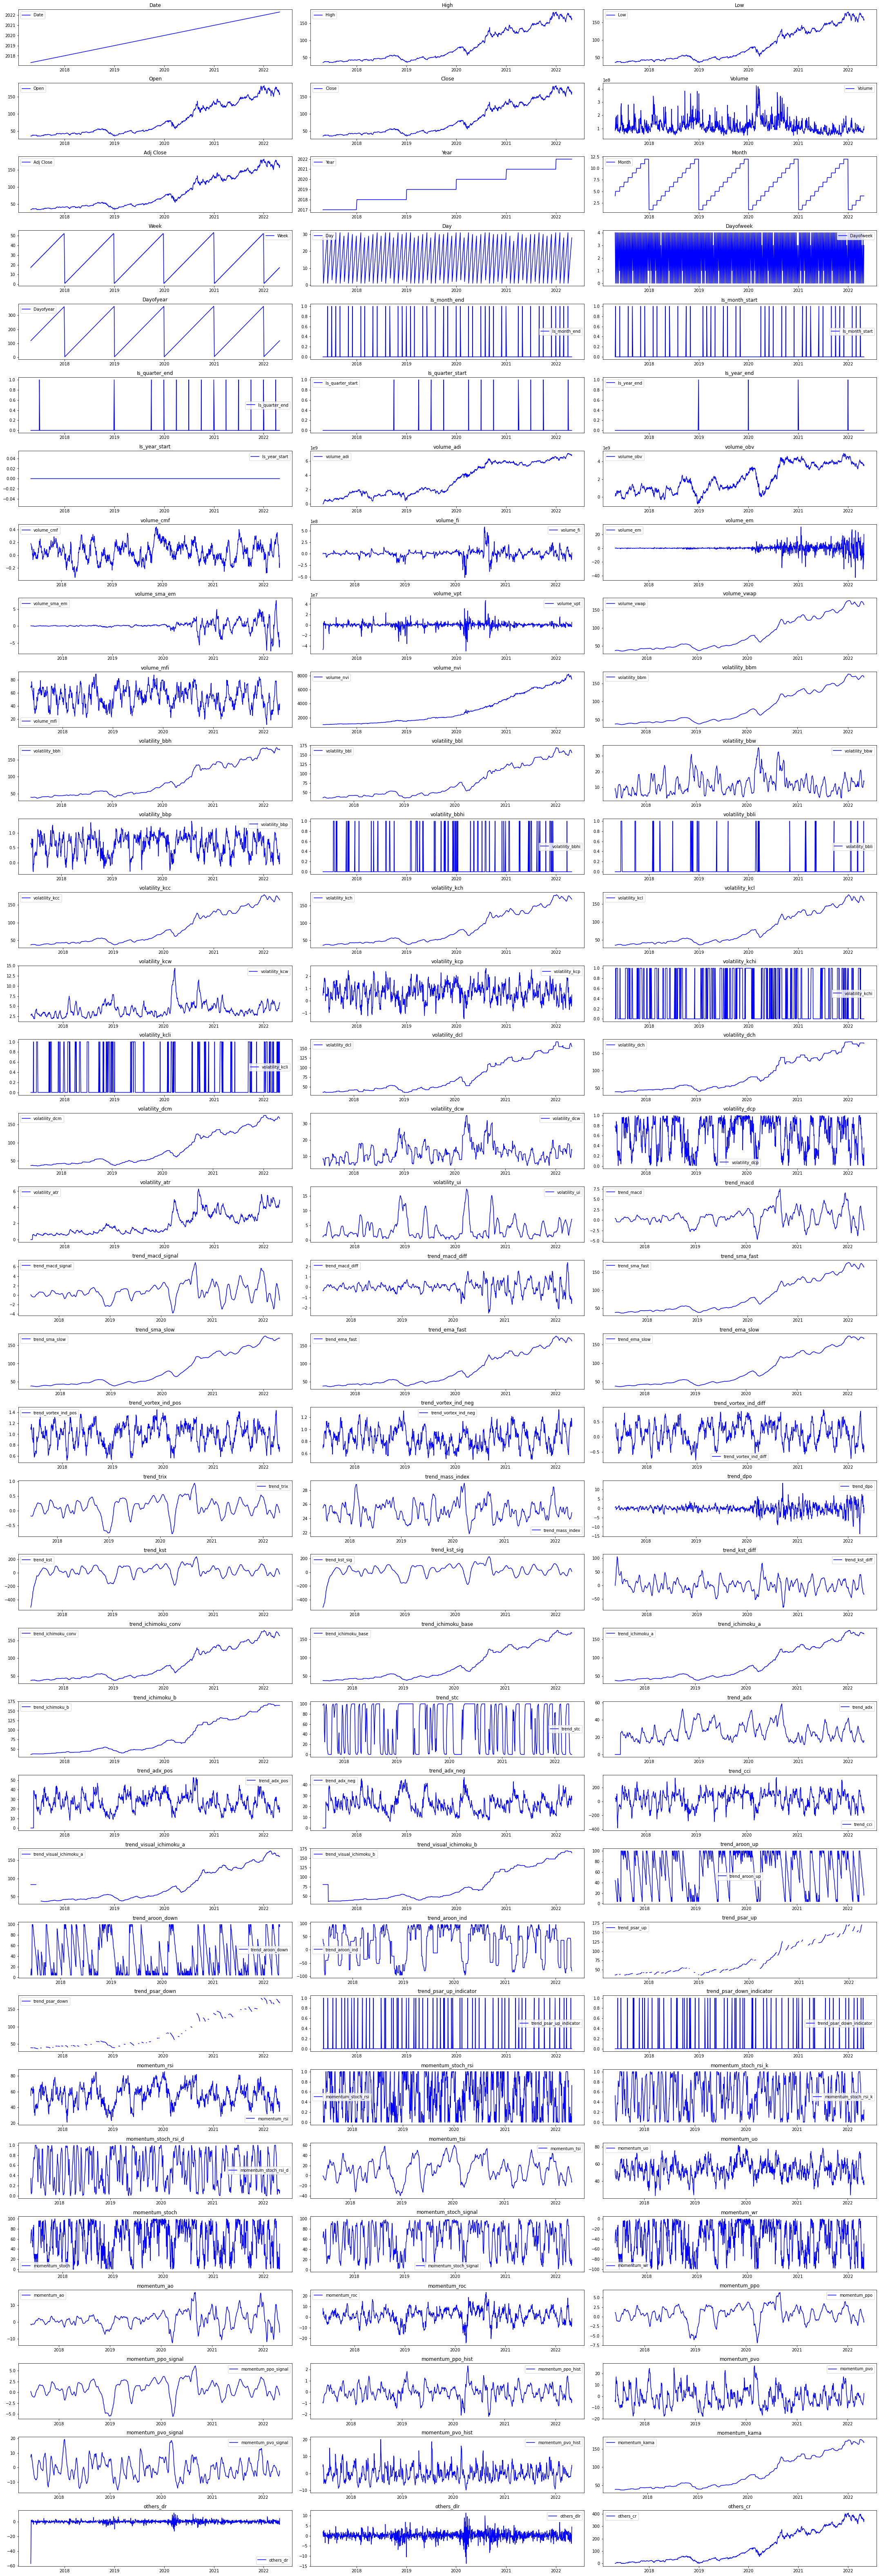

In [243]:
# plot time-series features 
plt.figure(figsize=(30,100))
try:
    for i, col in enumerate(aapl.columns.to_list()):
        plt.subplot(40, 3, i + 1)
        plt.plot(aapl[col], label=col, color='blue')
        plt.legend()
        plt.title(col)
        plt.tight_layout()
except Exception as e:
    print(col,e)

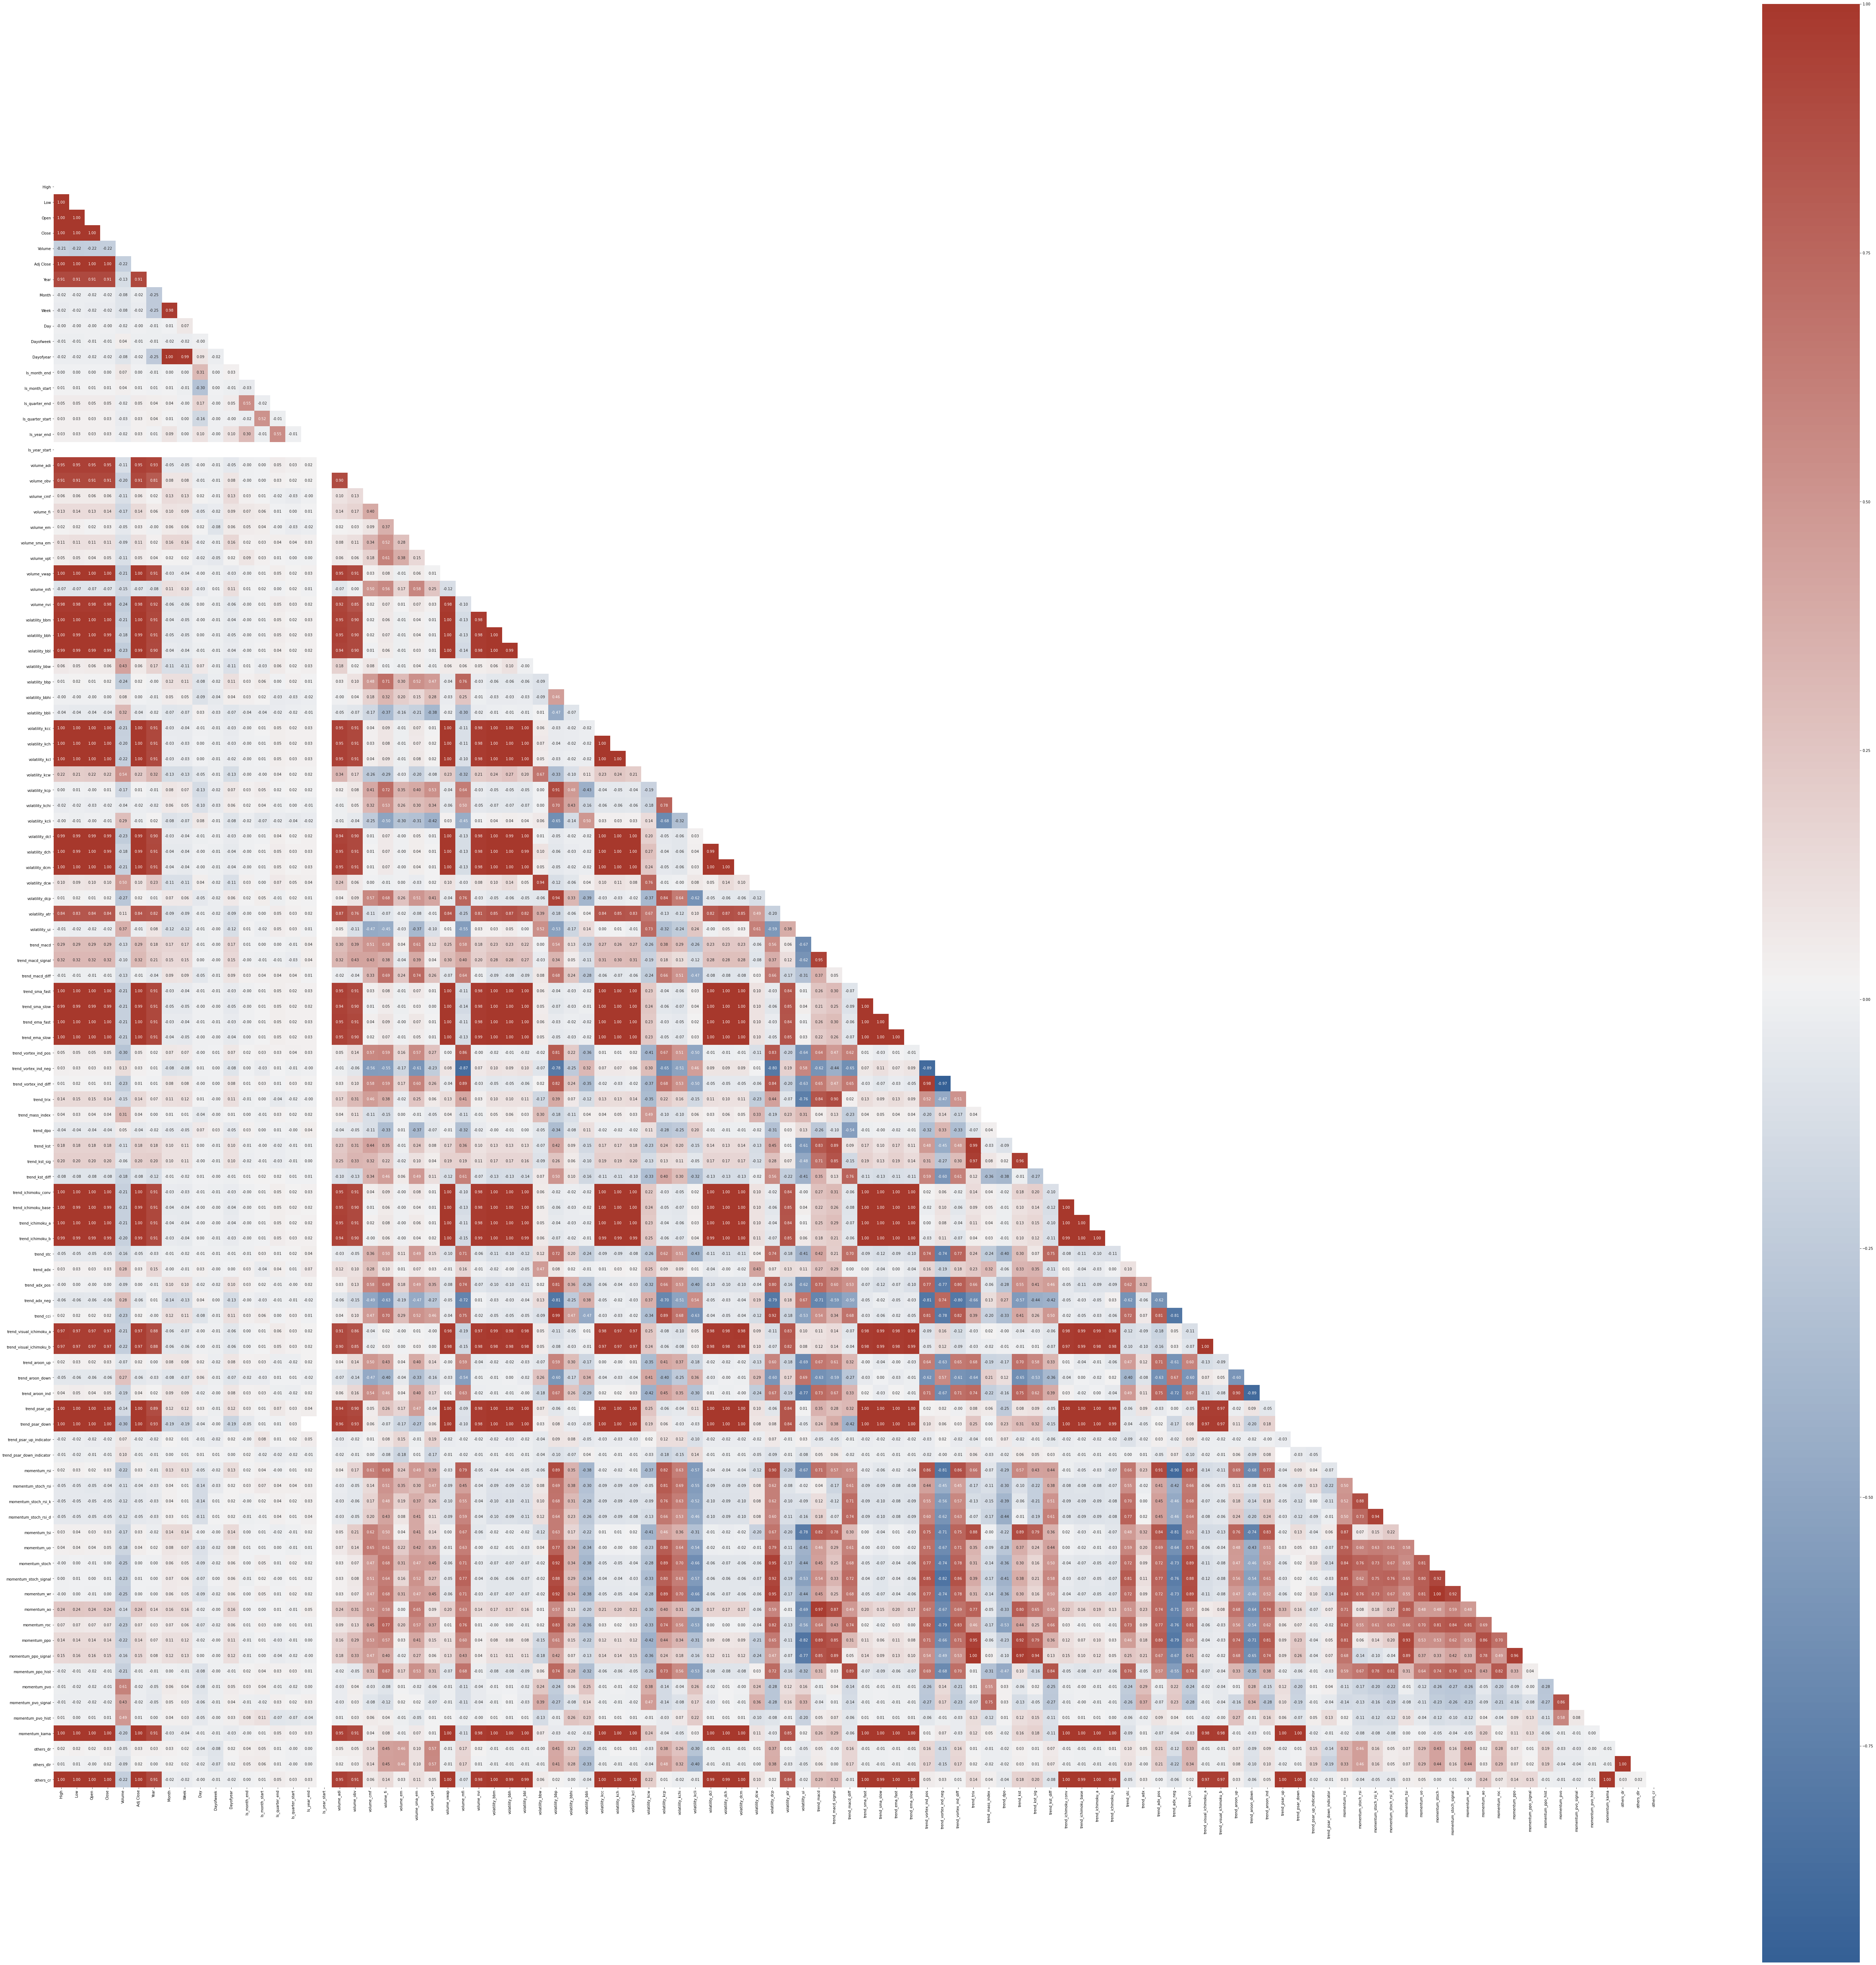

In [244]:
# Make a correlation heatmap https://towardsdatascience.com/advanced-time-series-analysis-in-python-decomposition-autocorrelation-115aa64f475e
# Create a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = aapl.corr(method="pearson")
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(100, 100))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.show()

Extract features within top 21 historical used technical features from Table 1 (https://www.sciencedirect.com/science/article/pii/S266682702100030X)

- SMA : trend_sma_fast (window size=12)
- WMA : none
- EMA : trend_ema_fast (window size=12)
- Momentum : included below
- Stochastic K% : momentum_stoch_rsi_k
- Stochastic D% : momentum_stoch_rsi_d
- Slow stochastic D% : none
- Relative strength index : momentum_rsi
- Moving average convergence–divergence : trend_macd
- William’s R% : momentum_wr
- Accumulation/Distribution oscillator : volume_adi
- Commodity channel index : none
- Rate of change : momentum_roc
- On-Balance Volume : volume_obv
- Disparity : none
- Bias : none
- Parabolic stop and reverse : trend_psar_up, trend_psar_down (however, drop this due to missing values)
- Volume : Volume
- Bollinger Bands : volatility_bbh, volatility_bbl
- Psychological line : none
- Price oscillator : none


In [249]:
selected_features = ['trend_sma_fast', 'trend_ema_fast', 'momentum_stoch_rsi_k', 'momentum_stoch_rsi_d', 'momentum_rsi', \
                    'trend_macd', 'momentum_wr', 'volume_adi', 'momentum_roc', 'volume_obv', \
                    'volatility_bbh', 'volatility_bbl']
basic_features = ['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Year', 'Month', 'Week', 'Day', 'Dayofweek']

selected_aapl = aapl[selected_features + basic_features]

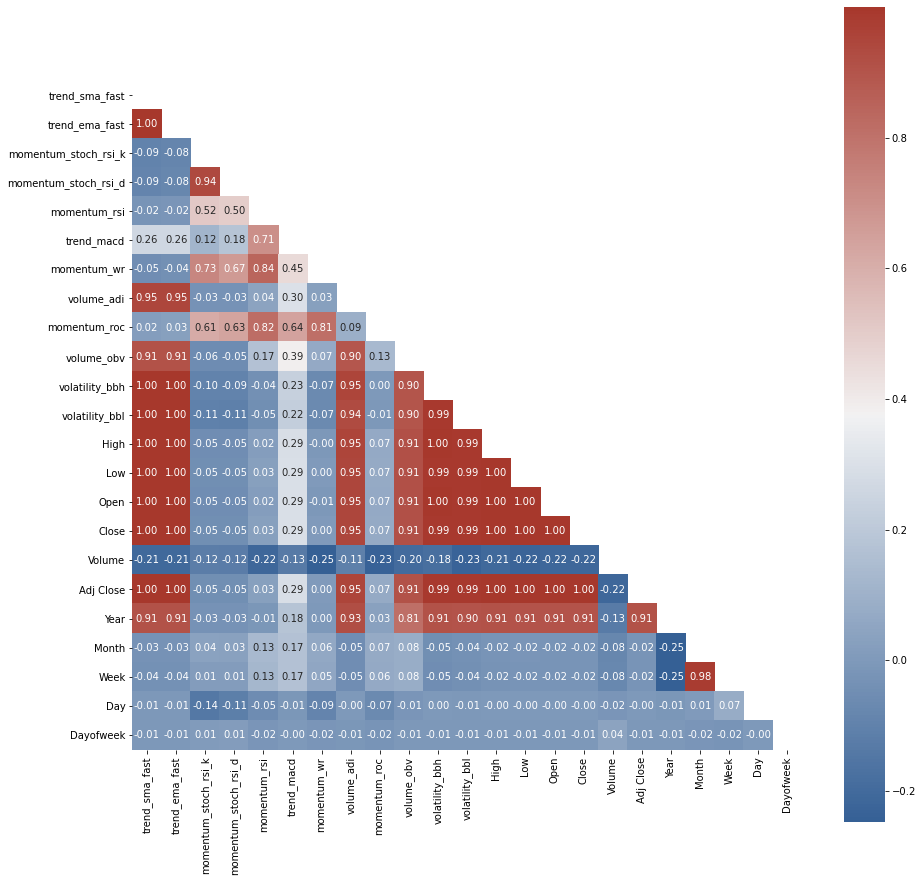

In [251]:
matrix = selected_aapl.corr(method="pearson")
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.show()

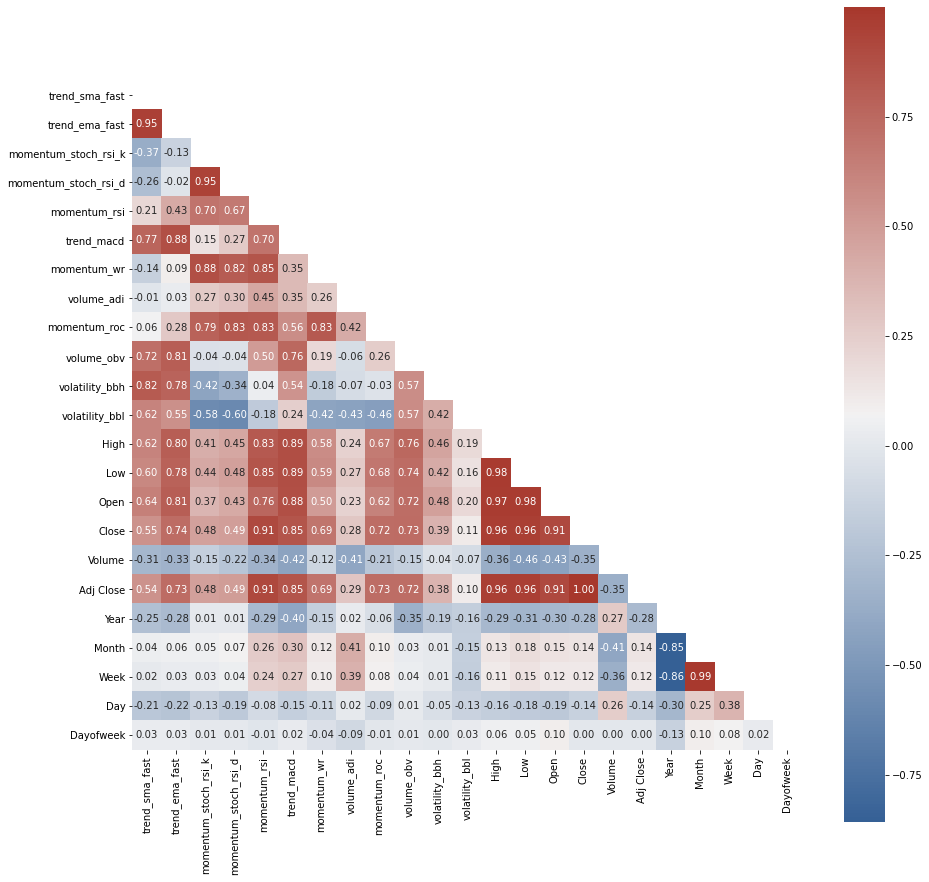

In [254]:
# Limit the sample to 4 months. 
latest_aapl = selected_aapl.loc['2021-12-29': , :]

matrix = latest_aapl.corr(method="pearson")
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.show()

In [255]:
latest_aapl.isnull().sum()

trend_sma_fast          0
trend_ema_fast          0
momentum_stoch_rsi_k    0
momentum_stoch_rsi_d    0
momentum_rsi            0
trend_macd              0
momentum_wr             0
volume_adi              0
momentum_roc            0
volume_obv              0
volatility_bbh          0
volatility_bbl          0
High                    0
Low                     0
Open                    0
Close                   0
Volume                  0
Adj Close               0
Year                    0
Month                   0
Week                    0
Day                     0
Dayofweek               0
dtype: int64